# Logistic Regression

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [22]:
X = [np.random.randint(low=1, high=7, size=(1)) for _ in range(50)]
Y = [1 if x >= 4 else 0 for x in X]
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((50, 1), (50,))

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40, 1), (10, 1), (40,), (10,))

In [24]:
model = LogisticRegression()
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

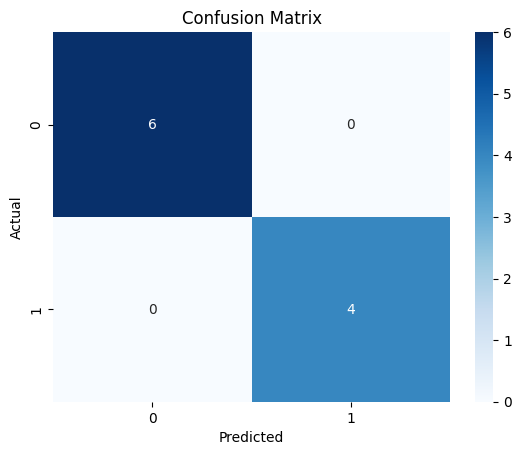

In [29]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

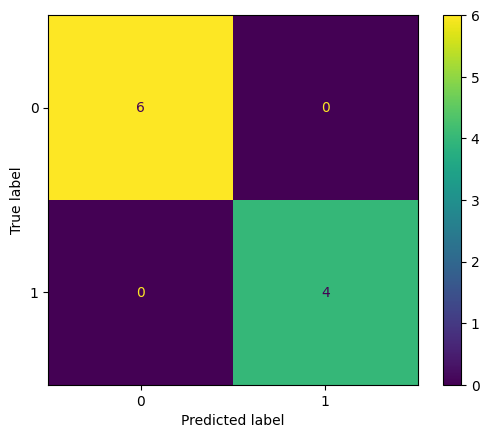

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

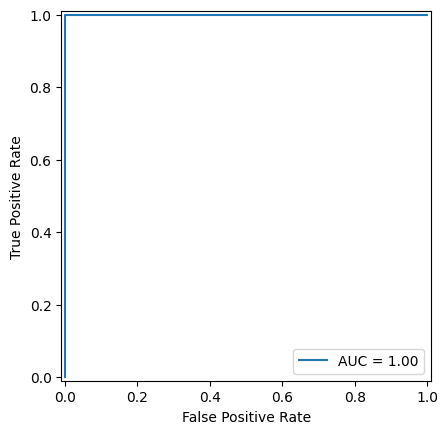

In [39]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.show()